# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
[Stunting Toddler (Balita) Detection (121K rows)](https://www.kaggle.com/datasets/rendiputra/stunting-balita-detection-121k-rows)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
from google.colab import userdata
import os
import random
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
url = 'https://raw.githubusercontent.com/agummds/Predictive-Analytics/master/Dataset/data_balita.csv'

df = pd.read_csv(url)
df.head(20)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
5,0,laki-laki,44.257719,stunted
6,0,laki-laki,59.572523,tinggi
7,0,laki-laki,42.701796,severely stunted
8,0,laki-laki,45.251779,stunted
9,0,laki-laki,57.201961,tinggi


In [ ]:
df.tail()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
120994,60,perempuan,100.6,normal
120995,60,perempuan,98.3,stunted
120996,60,perempuan,121.3,normal
120997,60,perempuan,112.2,normal
120998,60,perempuan,109.8,normal


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## a. Cek struktur dan informasi awal data

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


## b. Distribusi Status Gizi

<Axes: xlabel='Status Gizi', ylabel='count'>

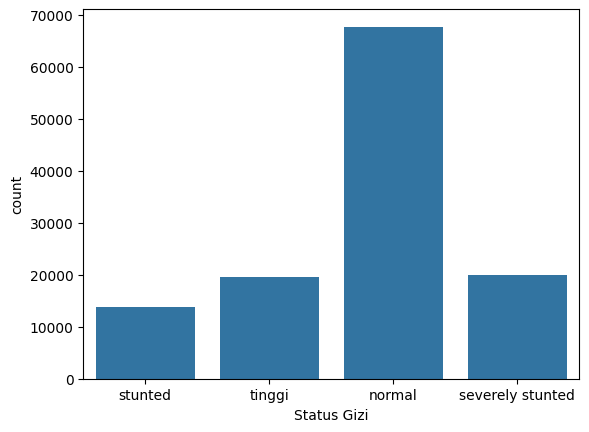

In [ ]:
sns.countplot(data=df, x='Status Gizi')

## d. Cek rata-rata tinggi & umur per kategori status gizi.

In [ ]:
df.groupby('Status Gizi')[['Umur (bulan)', 'Tinggi Badan (cm)']].describe()

Umur (bulan)                                               \
                        count       mean        std  min   25%   50%   75%   
Status Gizi                                                                  
normal                67755.0  32.607601  17.007331  0.0  19.0  34.0  47.0   
severely stunted      19869.0  26.290956  17.582342  0.0  11.0  24.0  41.0   
stunted               13815.0  32.763807  17.062236  0.0  19.0  34.0  48.0   
tinggi                19560.0  23.858129  17.572063  0.0   8.0  21.0  37.0   

                       Tinggi Badan (cm)                                   \
                   max             count       mean        std        min   
Status Gizi                                                                 
normal            60.0           67755.0  92.702689  15.676267  45.433571   
severely stunted  60.0           19869.0  73.176224  13.645497  40.010437   
stunted           60.0           13815.0  82.208722  12.436462  43.623654   
tinggi            60.0           19560.0  94.912898  18.259081  54.716373   

                                              
                     25%   50%    75%    max  
Status Gizi                                   
normal            82.800  94.9  104.2  123.9  
severely stunted  63.200  75.1   84.6   95.9  
stunted           74.900  84.9   92.1  100.7  
tinggi            79.975  96.0  110.0  128.0

## e. Umur vs Tinggi Badan (scatter plot)

Text(0.5, 1.0, 'Umur vs Tinggi Badan per Status Gizi')

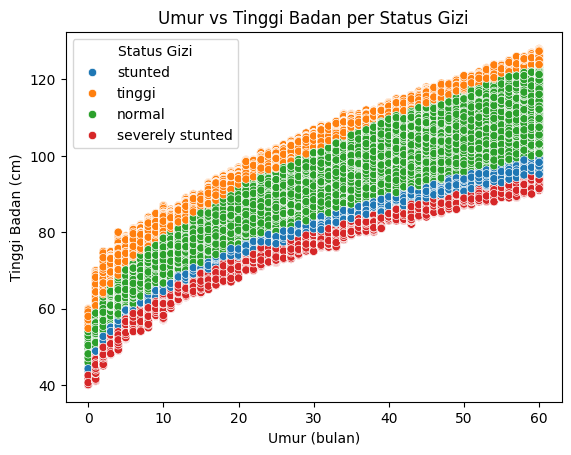

In [ ]:
sns.scatterplot(data=df, x='Umur (bulan)', y='Tinggi Badan (cm)', hue='Status Gizi')
plt.title('Umur vs Tinggi Badan per Status Gizi')

## 2. Jenis Kelamin vs Status Gizi (countplot with hue)

Text(0.5, 1.0, 'Distribusi Status Gizi per Jenis Kelamin')

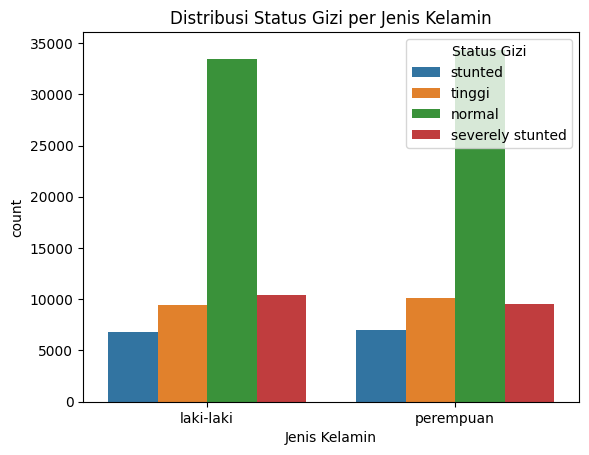

In [ ]:
sns.countplot(data=df, x='Jenis Kelamin', hue='Status Gizi')
plt.title('Distribusi Status Gizi per Jenis Kelamin')

## 3. Boxplot Tinggi Badan berdasarkan Status Gizi

Text(0.5, 1.0, 'Tinggi Badan per Kategori Status Gizi')

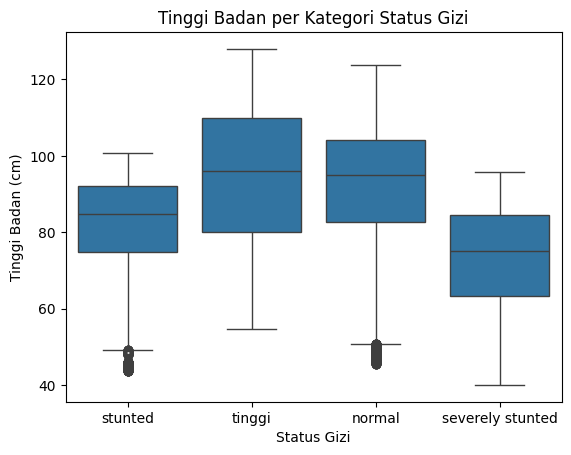

In [ ]:
sns.boxplot(data=df, x='Status Gizi', y='Tinggi Badan (cm)')
plt.title('Tinggi Badan per Kategori Status Gizi')

## Check for missing values


In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing Values Analysis:")
display(missing_df)

Missing Values Analysis:


,Missing Values,Percentage
Umur (bulan),0,0.0
Jenis Kelamin,0,0.0
Tinggi Badan (cm),0,0.0
Status Gizi,0,0.0
Status Gizi Encoded,0,0.0


## Cek Data Duplikat

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Sebanyak {duplicates} data duplikat ({duplicates/len(df):.2%} dalam dataset)")
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"Data dupikat dihapus. New dataset size: {df.shape}")
else:
    print("✅ Tidak ada data dupliakt.")

Number of duplicate rows: 0
✅ Tidak ada data dupliakt.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Encode kolom kategorikal dan cek korelasi

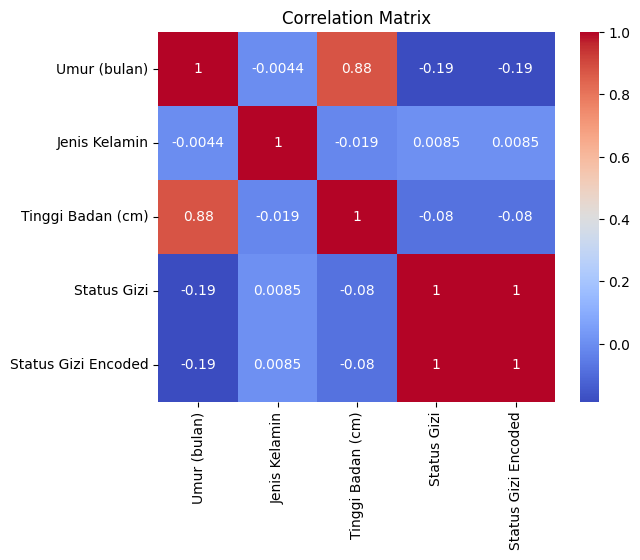

In [ ]:
df_encoded = df.copy()
le_gender = LabelEncoder()
le_status = LabelEncoder()

df_encoded['Jenis Kelamin'] = le_gender.fit_transform(df_encoded['Jenis Kelamin'])
df_encoded['Status Gizi'] = le_status.fit_transform(df_encoded['Status Gizi'])

# Sekarang bisa cek korelasi
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df_encoded.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi,Status Gizi Encoded
0,0,0,44.591973,2,2
1,0,0,56.705203,3,3
2,0,0,46.863358,0,0
3,0,0,47.508026,0,0
4,0,0,42.743494,1,1


In [ ]:
df_encoded.tail()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi,Status Gizi Encoded
120959,60,1,100.7,0,0
120967,60,1,113.7,0,0
120968,60,1,107.5,0,0
120972,60,1,127.6,3,3
120993,60,1,116.1,0,0


## Pembagian Dataset

**Encode target (y) SEBELUM split**

In [ ]:
le_status = LabelEncoder()
df['Status Gizi Encoded'] = le_status.fit_transform(df['Status Gizi'])

X = df[['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']]
y = df['Status Gizi Encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Encode fitur kategorikal

le_gender = LabelEncoder()
X_train['Jenis Kelamin'] = le_gender.fit_transform(X_train['Jenis Kelamin'])
X_test['Jenis Kelamin'] = le_gender.transform(X_test['Jenis Kelamin'])


##  Model Training dan Evaluasi
## a. Decision Tree Classifier
Decision Tree Classifier adalah salah satu algoritma machine learning untuk tugas klasifikasi yang bekerja dengan cara membagi data ke dalam cabang-cabang berdasarkan fitur-fitur tertentu hingga mencapai keputusan akhir (kelas)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:
y_test_labels = le_status.inverse_transform(y_test)
y_pred_labels = le_status.inverse_transform(y_pred_dt)

In [ ]:
print(classification_report(y_test_labels, y_pred_labels))

                  precision    recall  f1-score   support

          normal       0.99      0.99      0.99      4303
severely stunted       0.99      0.99      0.99      1304
         stunted       0.97      0.97      0.97       883
          tinggi       0.99      0.99      0.99      1395

        accuracy                           0.99      7885
       macro avg       0.98      0.99      0.99      7885
    weighted avg       0.99      0.99      0.99      7885



In [ ]:
!pip freeze > requirements.txt
